In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv("headbrain.csv",encoding="latin1")

In [22]:
df.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [24]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [25]:
df.shape

(237, 4)

In [26]:
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [27]:
x.shape

(237,)

In [28]:
y.shape

(237,)

In [29]:
m_x = np.mean(x)
m_y = np.mean(y)

n = len(x)

num = 0
denom = 0

for i in range(n):
    num += (x[i] - m_x) * (y[i] - m_y)
    denom += (x[i] - m_x) ** 2
m = num/denom
c = m_y - (m * m_x)

print(m,',',c)

0.26342933948939945 , 325.57342104944223


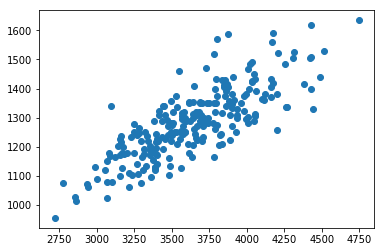

In [30]:
plt.scatter(x, y)

In [31]:
min_x = np.min(x) - 100
max_x = np.max(x) + 100

In [32]:
xx = np.linspace(min_x, max_x, 1000)

In [35]:
yy = m*xx+c

Text(0, 0.5, 'Brain weight in grams')

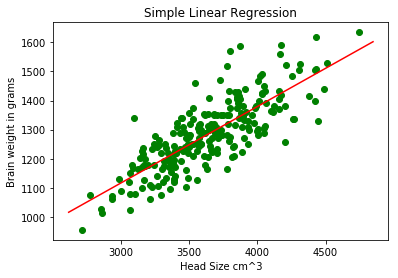

In [36]:
plt.scatter(x, y, color='g')
plt.plot(xx, yy, color='r')
plt.title('Simple Linear Regression')
plt.xlabel("Head Size cm^3")
plt.ylabel("Brain weight in grams")

In [37]:
pred = 0
act = 0

for i in range(n):
    y_p = (m*x[i]+c)
    pred += (y[i] - y_p) ** 2
    act += (y[i] - m_y) ** 2
    
r2 = 1 - (pred/act)
print(r2)

0.6393117199570003


In [38]:
def predict(xx):
    yy = m*xx + c
    print(yy)

In [39]:
predict(4177)

1425.9177720966638


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x = x.reshape((n, 1))

In [41]:
x.shape

(237, 1)

In [43]:
yy.shape

(1000,)

In [44]:
lg = LinearRegression()

In [45]:
lg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_p = lg.predict(x)

In [47]:
mse = mean_squared_error(y, y_p)

In [48]:
rmse = np.sqrt(mse)

In [49]:
r2_score = lg.score(x, y)

In [50]:
print(rmse)
print(r2_score)

72.1206213783709
0.639311719957


In [51]:
lg.predict([[4177]])

array([1425.9177721])

In [52]:
lg.intercept_

325.5734210494428